# Sales Analysis

#### Import Necessary Libraries

In [148]:
import pandas as pd
import os

#### Task 1: Merge 12 months of sales data into a single file

In [149]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('./Sales_Data')] # load in the files as a list

all_months_data = pd.DataFrame() # Creates an empty dataframe

for file in files:
    df = pd.read_csv('./Sales_Data/'+file) # "+" can be used to concatenate strings
    all_months_data = pd.concat([all_months_data,df]) # stitch all of the csv files together
    
all_months_data.to_csv('all_data.csv', index=False) # Save as a csv file

#### Read in updated dataframe

In [150]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!

#### Drop rows of NAN

In [151]:
# isna answers whether the data is NA or not.
# any(axis=1) answers whether any of columns (axis=1) within the rows (false true false true etc) are true i.e. contain an NA value
# and returns the row
# all_data[all_data.isna().any(axis=1)] will return a dataframe containing rows with NA values as a result

nan_df = all_data[all_data.isna().any(axis=1)] # find examples of rows with NA values
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
all_data = all_data.dropna(how='all') # drop rows containing NA values
nan_df = all_data[all_data.isna().any(axis=1)] # test that the rows are now gone
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Find 'Or' and delete it

In [153]:
# We are seeing "or" in Order Date which is unwanted

or_df = all_data[all_data['Order Date'].str[0:2] == 'Or']

or_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [154]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] # Simply select all except rows containing 'Or' for Order Date
or_df = all_data[all_data['Order Date'].str[0:2] == 'Or'] # Check whether issue has been fixed
or_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Convert columns to the correct type

In [155]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Convert to int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Convert to float
all_data.dtypes # check that the conversions worked

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### Augment data with additional columns

#### Task 2: Add Month Column

In [156]:
all_data['Month'] = all_data['Order Date'].str[0:2] # take the first two characters of Order Date as month
all_data['Month'] = all_data['Month'].astype('int32') # Cut off the zeroes
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add a sales column

In [157]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4: Add a city column and a state column

In [158]:
# Use .apply()

# Split using commas and take the second element [1]. Also strip the trailing whitespace
all_data['City'] = all_data['Purchase Address']. apply(lambda x: x.split(',')[1]).str.strip()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [159]:
# Split using spaces and take the second to last element [-2]
all_data['State'] = all_data['Purchase Address']. apply(lambda x: x.split(' ')[-2])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [160]:
# Combine City and State into one column

all_data['City with State'] = all_data['City']+' ('+all_data['State']+')'
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City with State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,Los Angeles (CA)


### Question 1: What was the best month for sales? How much was earned that month?

In [161]:
results = all_data.groupby('Month').sum().reset_index() # Must use reset_index() to keep Month
results['Sales'] = results['Sales'].round(2) # Make Sales look nicer

results[["Month", "Quantity Ordered", "Sales"]]

,Month,Quantity Ordered,Sales
0,1,10903,1822256.73
1,2,13449,2202022.42
2,3,17005,2807100.38
3,4,20558,3390670.24
4,5,18667,3152606.75
5,6,15253,2577802.26
6,7,16072,2647775.76
7,8,13448,2244467.88
8,9,13109,2097560.13
9,10,22703,3736726.88


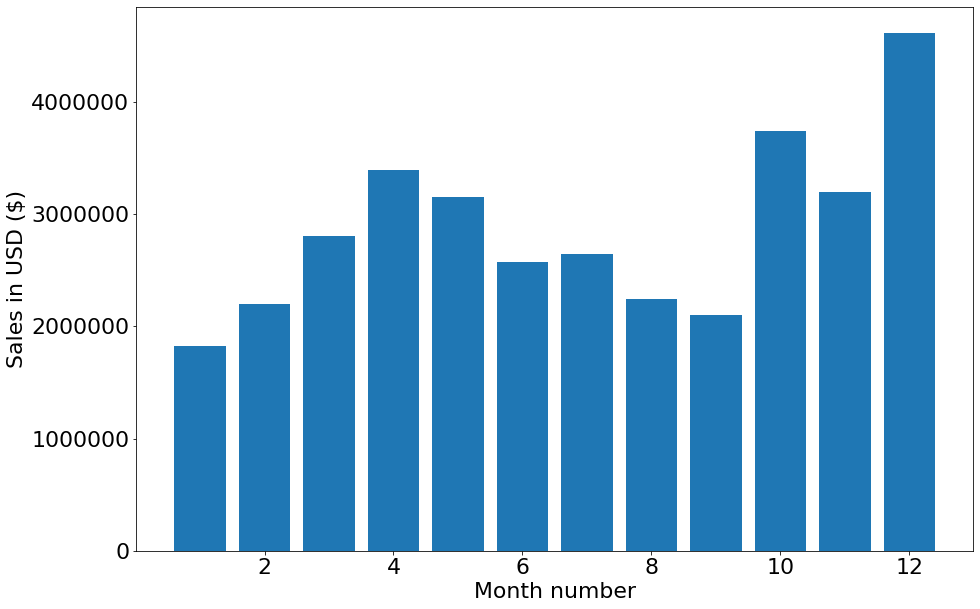

In [162]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,10))

plt.bar(results['Month'], results['Sales'])
plt.xlabel('Month number')
plt.ylabel('Sales in USD ($)')
plt.ticklabel_format(style='plain') # Get rid of scientific notation
plt.show()

We conclude that the December was the best month for sales with $4.61 million generated in sales. It makes sense since December is the month for Christmas where many people are looking to buy gifts for their friends and family.

### Question 2: Which city had the highest number of sales?

In [163]:
# groupby, sort, and reset index to adopt the labels
results = all_data.groupby('City with State').sum().sort_values('Sales', ascending=False)[['Sales']].reset_index()
results['Sales'] = results['Sales'].round(2) # Make Sales look nicer

results

,City with State,Sales
0,San Francisco (CA),8262203.91
1,Los Angeles (CA),5452570.80
2,New York City (NY),4664317.43
3,Boston (MA),3661642.01
4,Atlanta (GA),2795498.58
5,Dallas (TX),2767975.40
6,Seattle (WA),2747755.48
7,Portland (OR),1870732.34
8,Austin (TX),1819581.75
9,Portland (ME),449758.27


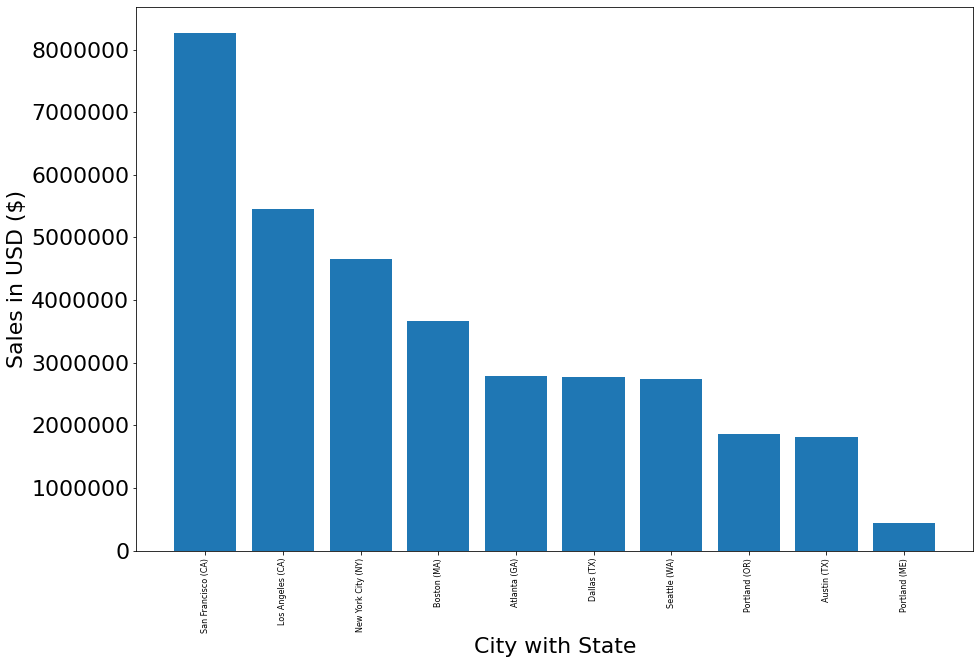

In [164]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

plt.bar(results['City with State'], results['Sales'])
plt.xticks(results['City with State'], rotation='vertical', size=8)
plt.xlabel('City with State')
plt.ylabel('Sales in USD ($)')
plt.ticklabel_format(axis='y', style='plain') # Get rid of scientific notation
plt.show()

We conclude that the San Francisco was the best city for sales with $8.26 million generated in sales. We dealing with sales data of an electronics store, perhaps Silicon Valley has a higher demand for electronics. It may be because people in San Francisco have higher salaries and therefore have more money to spend on electronics.

### Question 3: What time should we display advertisements to maximize likelihood of customers buying a product?

In [165]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) # convert to datetime

In [166]:
all_data['Hour'] = all_data['Order Date'].dt.hour # Extract hour from order date
all_data['Minute'] = all_data['Order Date'].dt.minute # Extract minute from order date

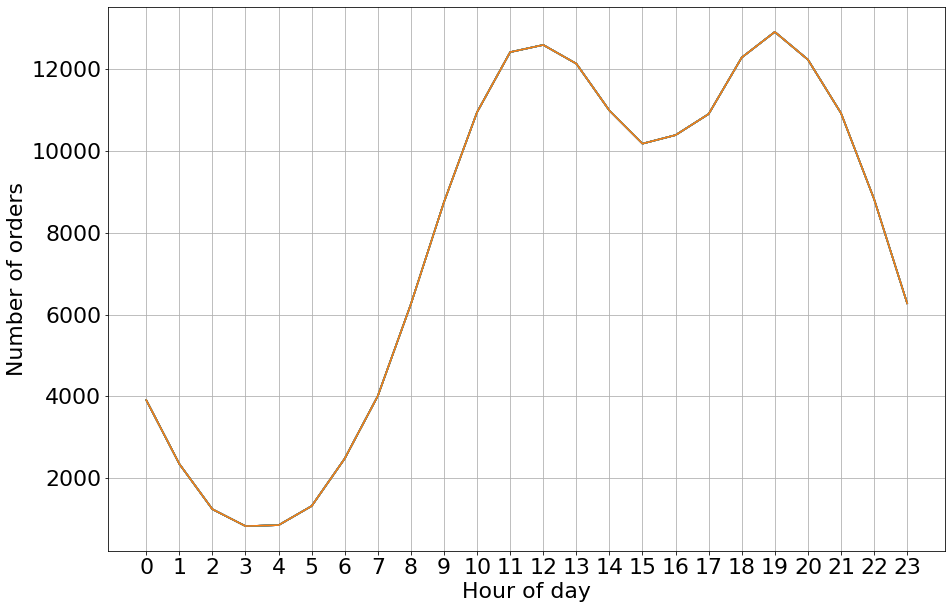

In [167]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.figure(figsize=(15,10))
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour of day')
plt.ylabel('Number of orders')
plt.show()

We have peaks at 11am and 7pm, so we can display advertisements around these peaks to maximise likelihood of customers buying a product since it is clear that there are more custoemrs who are willing to make a purchase during these hours.

### Question 4: Which products are most frequently sold together?

In [168]:
df = all_data[all_data['Order ID'].duplicated(keep=False)] # Remove non duplicates
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

<ipython-input-168-7fa3495184f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City with State,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [169]:
# Order IDs and Grouped are now duplicated whenever a customer purchase multiple items therefore we need
# to remove these duplicates.

df = df[['Order ID', 'Grouped']].drop_duplicates() # now we have order IDs and all items in the group
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [170]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


With this, we may to able to promote pair of items as a bundle in order to boost sales. For example, if a customer were to purchase an iPhone, we may wish to suggest adding a Lightning Charging Cable to their order since many customers already order both items.

### Question 5: Which product was sold the most? Why do you think that it was sold the most?

In [171]:
results = all_data.groupby('Product').sum()[['Quantity Ordered']].reset_index()
results.head()

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635


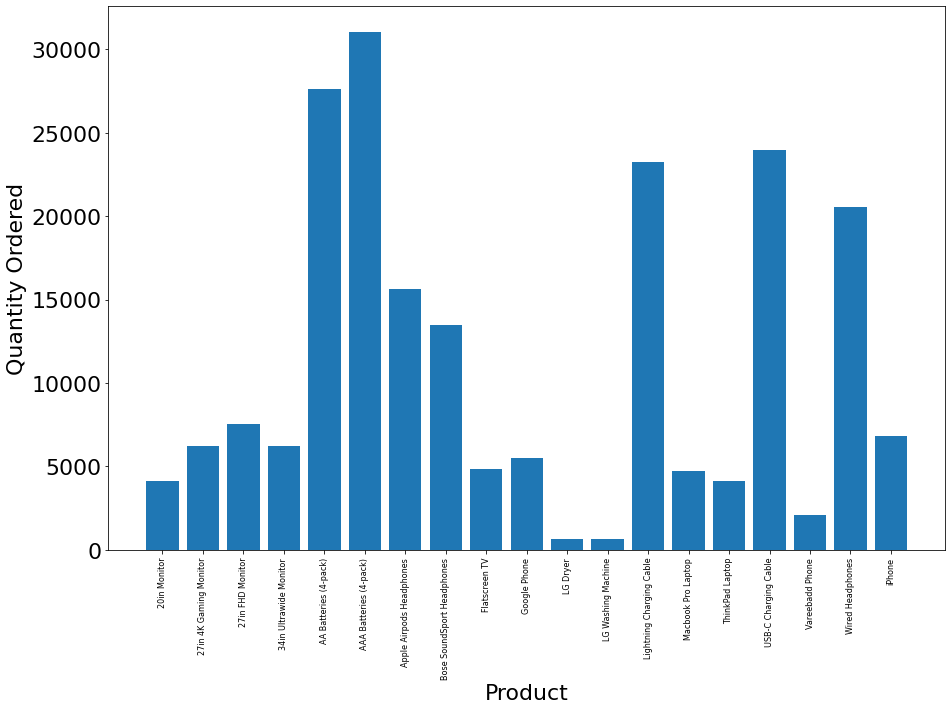

In [177]:
plt.figure(figsize=(15,10))
plt.bar(results['Product'], results['Quantity Ordered'])
plt.xticks(results['Product'], rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

Clearly cheaper items such as batteries or charging cables were higher in demand which makes sense as these items are cheaper than other electronics and can be used for a wide range of devices.

To check the correlation between the quantity ordered and price of each individual item, we can overlay this graph with a line graph of the prices to compare.

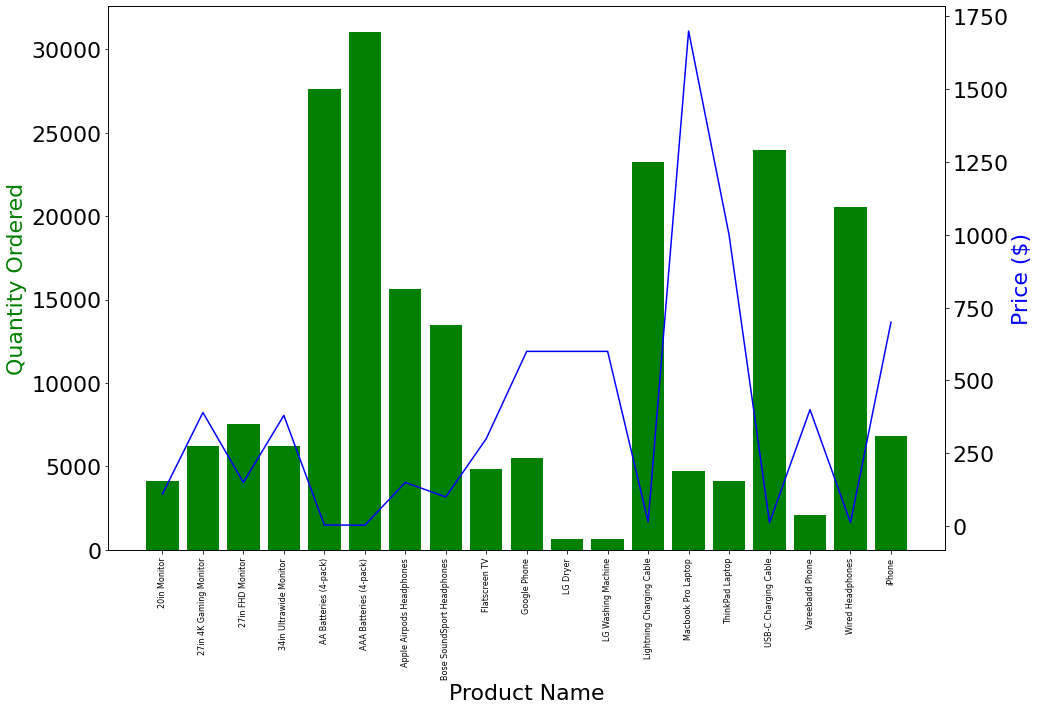

In [187]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots(figsize=(15,10))

ax2 = ax1.twinx() # share the x axis of the first graph with the second one
ax1.bar(results['Product'], results['Quantity Ordered'], color='g')
ax2.plot(results['Product'], prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticks(results['Product'])
ax1.set_xticklabels(results['Product'], rotation='vertical', size=8)

plt.show()

From this we can conclude that there is a strong correlation between between the quantity ordered and price of each individual item. More people will have money for cheap goods than expensive ones therefore they would be more willing to purchase cheaper goods as they see fit.